# 1- Importing libraries

In [44]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

from matplotlib import rcParams
rcParams['figure.figsize'] = 13, 6 
plt.rcParams['font.size'] = 10
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] =False
%config InlineBackend.figure_format = 'retina'

2.15.0
1.26.3


In [45]:
from PIL import Image 
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


# 2- Resizing images

In [46]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    # target_size=(28,28)
    target_size=(224,224)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.LANCZOS)  # Replace Image.ANTIALIAS with Image.LANCZOS
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/Users/kenny_jung/aiffel/data/sc_ro_pa/train/scissor"  # Assign a valid string value to image_dir_path
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

1117  images to be resized.
1117  images resized.
가위 이미지 resize 완료!


In [47]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    # target_size=(28,28)
    target_size=(224,224)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.LANCZOS)  # Replace Image.ANTIALIAS with Image.LANCZOS
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/Users/kenny_jung/aiffel/data/sc_ro_pa/train/rock"  # Assign a valid string value to image_dir_path
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

1288  images to be resized.
1288  images resized.
바위 이미지 resize 완료!


In [48]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    # target_size=(28,28)
    target_size=(224,224)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.LANCZOS)  # Replace Image.ANTIALIAS with Image.LANCZOS
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/Users/kenny_jung/aiffel/data/sc_ro_pa/train/paper"  # Assign a valid string value to image_dir_path
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

1271  images to be resized.
1271  images resized.
보 이미지 resize 완료!


# 3- Labeling train dataset

In [76]:
import numpy as np

def load_data(img_path, number_of_data=3676):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    # img_size=28
    img_size=224
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "/Users/kenny_jung/aiffel/data/sc_ro_pa/train"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 3676 입니다.
x_train shape: (3676, 224, 224, 3)
y_train shape: (3676,)


라벨:  0


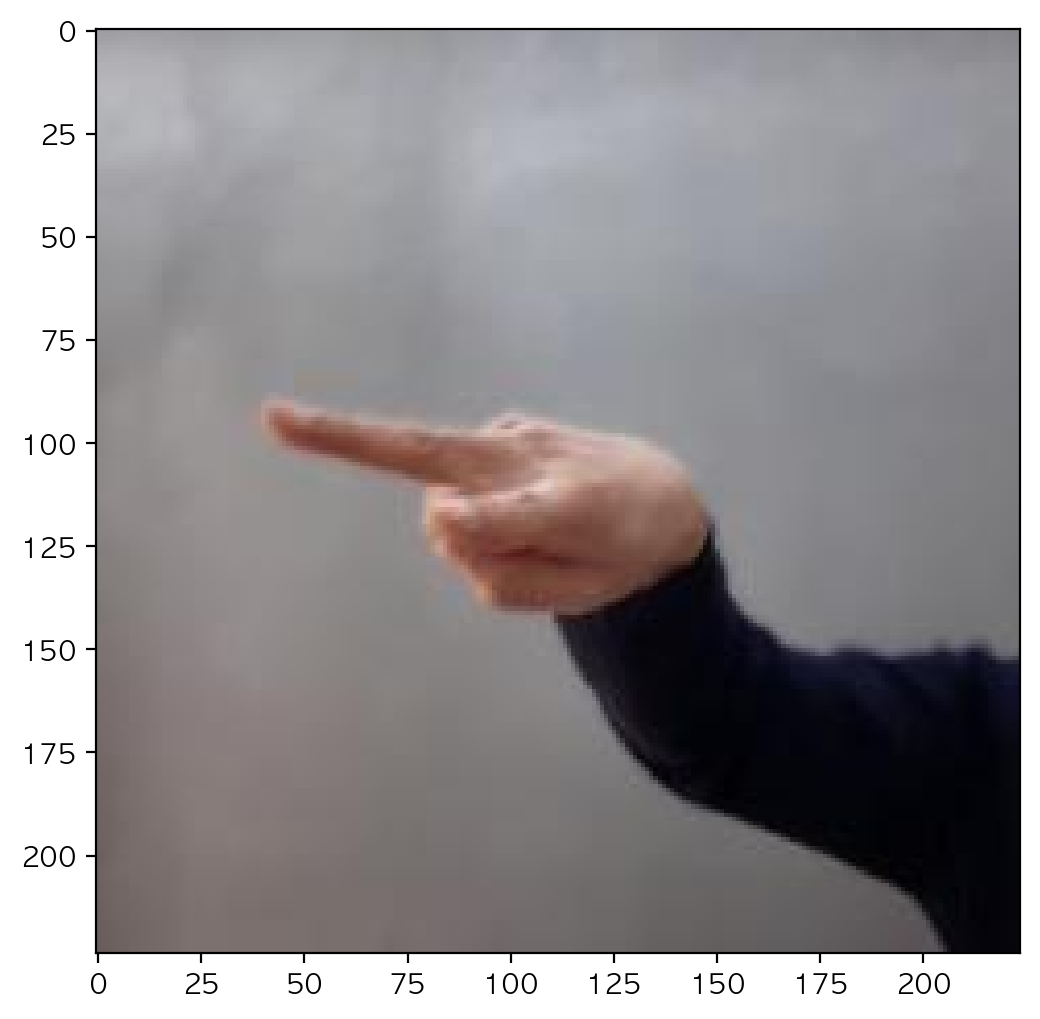

In [50]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

# 4- Designing model

In [59]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?

# parameters for tuning model
n_channel_1 = 16
n_channel_2 = 32
n_dense = 64
n_train_epoch = 30

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(
    n_channel_1,
    (3, 3),
    activation = 'relu',
    input_shape = (224, 224, 3)
))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(
    n_channel_2,
    (3, 3),
    activation = 'relu'
))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(
    n_dense,
    activation = 'relu',
    # kernel_regularizer=regularizers.l1_l2(.001),  # L1 규제와 L2 규제를 추가
))
model.add(keras.layers.Dropout(0.2)) # 드롭아웃 추가
model.add(keras.layers.Dense(
    3,
    activation = 'softmax'
))


model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 111, 111, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 93312)             0         
                                                                 
 dense_6 (Dense)             (None, 64)               

# 5- Training model

In [60]:
# model compile
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

# model training
history = model.fit(
    x_train,
    y_train,
    # validation_data=(x_test, y_test),
    epochs=n_train_epoch,
    batch_size = 300,
)


Epoch 1/30
13/13 [==============================] - 2s 134ms/step - loss: 2931.4390 - accuracy: 0.3414
Epoch 2/30
13/13 [==============================] - 2s 128ms/step - loss: 1777.0515 - accuracy: 0.3566
Epoch 3/30
13/13 [==============================] - 2s 125ms/step - loss: 1327.3669 - accuracy: 0.3781
Epoch 4/30
13/13 [==============================] - 2s 123ms/step - loss: 702.2520 - accuracy: 0.4344
Epoch 5/30
13/13 [==============================] - 2s 123ms/step - loss: 339.4289 - accuracy: 0.5539
Epoch 6/30
13/13 [==============================] - 2s 127ms/step - loss: 176.8679 - accuracy: 0.6434
Epoch 7/30
13/13 [==============================] - 2s 125ms/step - loss: 149.2922 - accuracy: 0.7097
Epoch 8/30
13/13 [==============================] - 2s 125ms/step - loss: 177.5465 - accuracy: 0.7350
Epoch 9/30
13/13 [==============================] - 2s 127ms/step - loss: 166.0358 - accuracy: 0.7865
Epoch 10/30
13/13 [==============================] - 2s 122ms/step - loss: 135.

In [61]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


# 6- Evaluation model

Text(0, 0.5, 'Accuracy')

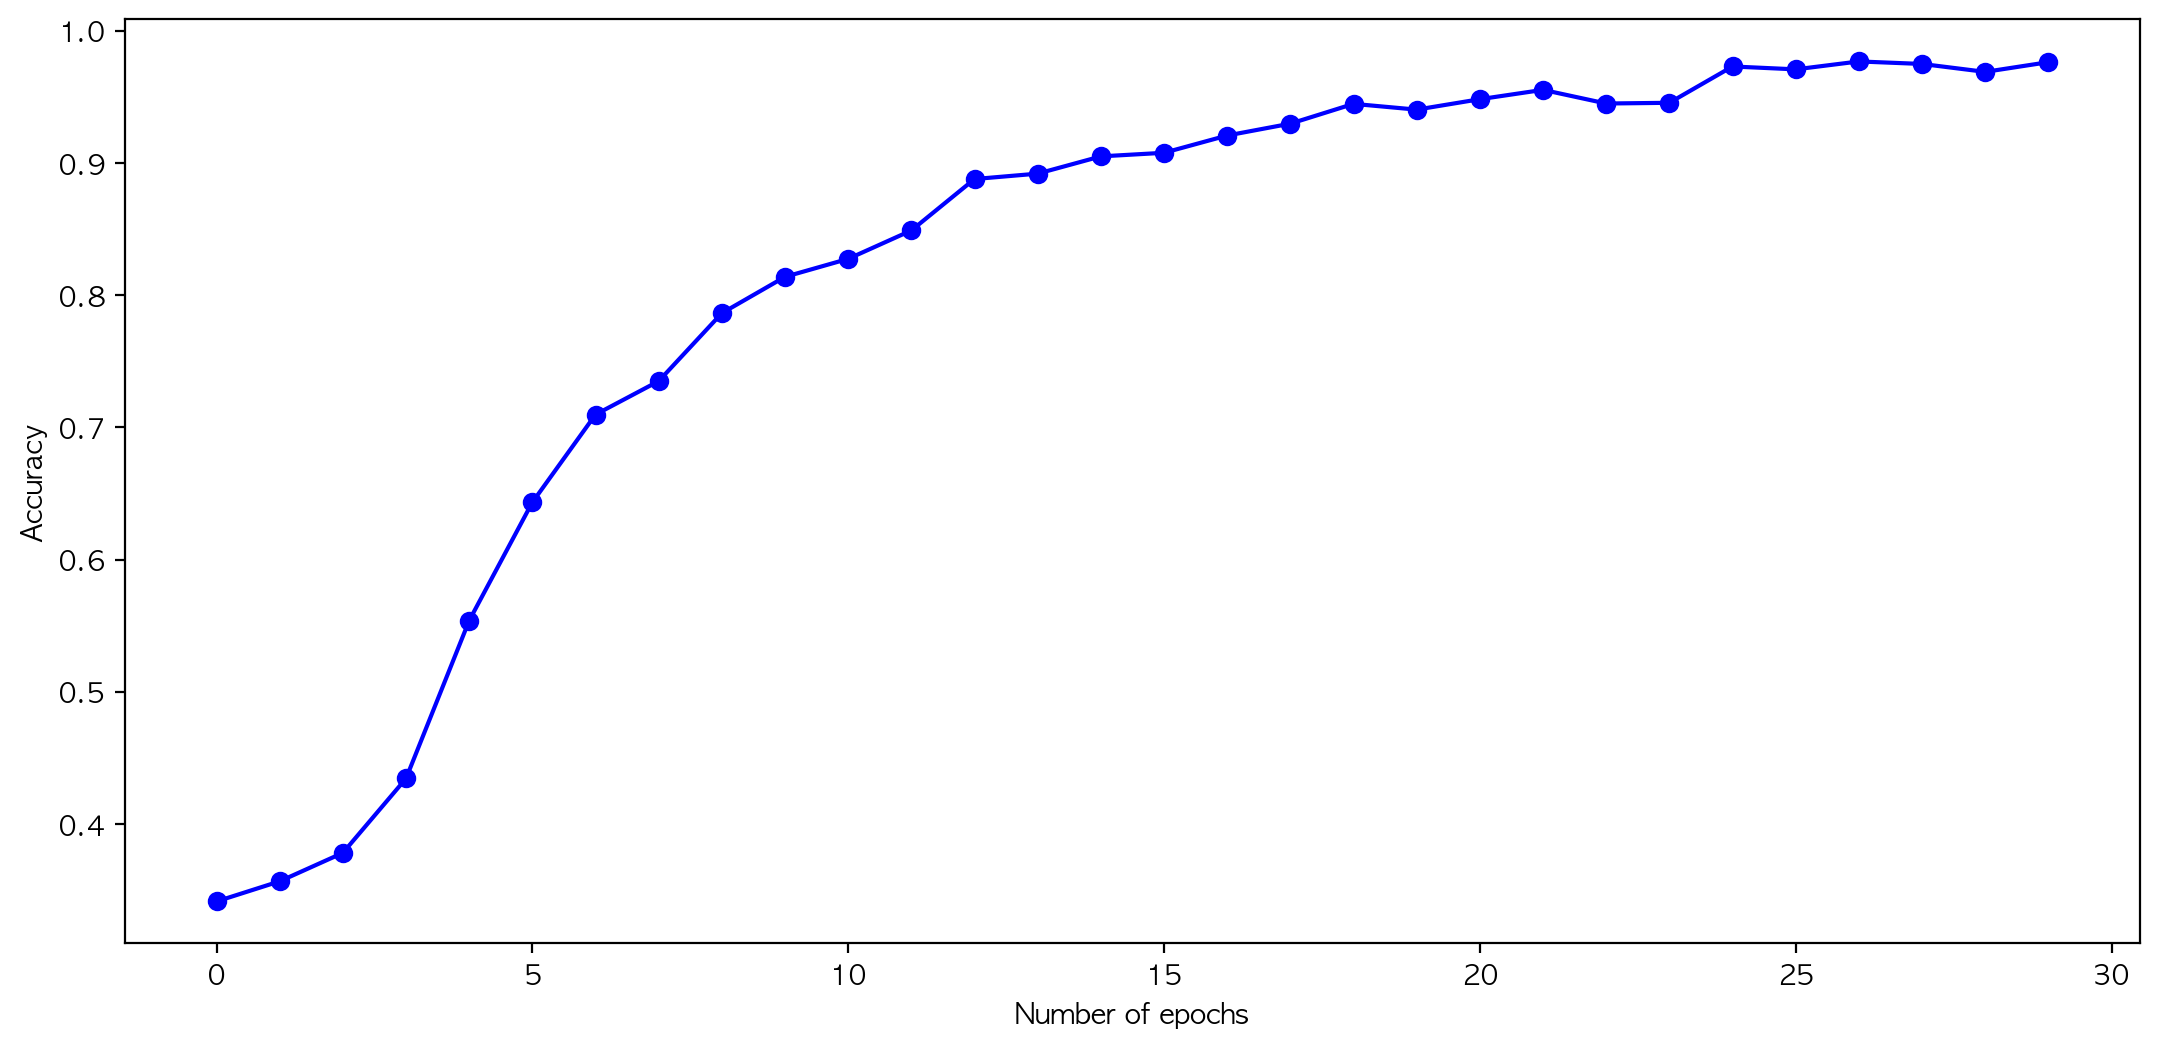

In [62]:
epochs_ = range(0, n_train_epoch)  # number of epochs  
accuracy_train = history.history['accuracy']  ##getting  accuracy of each epochs

plt.plot(epochs_, accuracy_train, label='Training accuracy', color='blue', marker = 'o')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

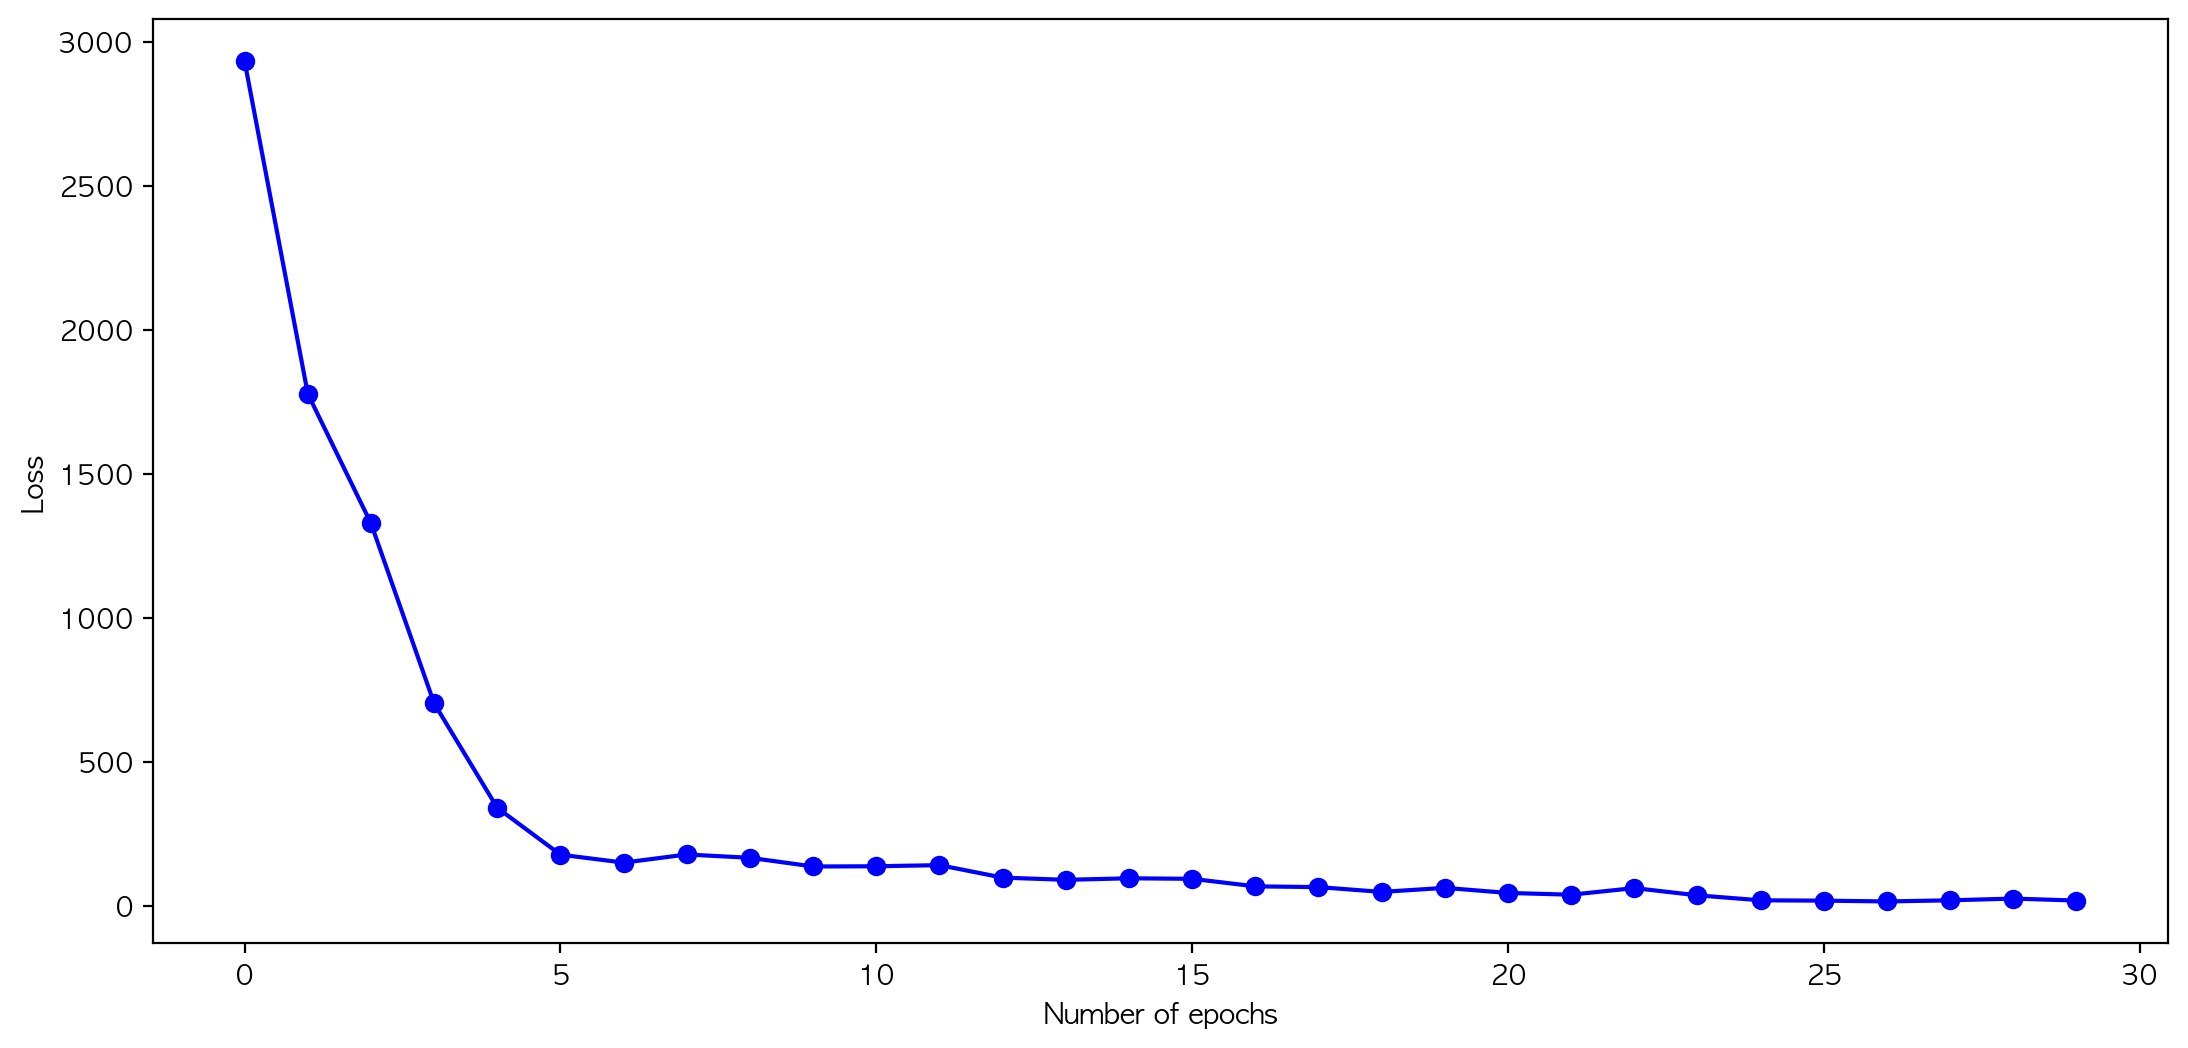

In [63]:
epochs_ = range(0, n_train_epoch)  # number of epochs  
loss_train = history.history['loss']    ##getting  loss of each epochs

plt.plot(epochs_, loss_train, label='training loss', color='blue', marker = 'o')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')

### Rename jpg file name with directory and initial

In [75]:
# import os
# import shutil

# def rename_files_in_directory(directory_path, initials):
#     # Get all files in the directory
#     files = os.listdir(directory_path)

#     # Filter out all .jpg files
#     jpg_files = [f for f in files if f.endswith('.jpg')]

#     # Loop over all .jpg files
#     for i, file_name in enumerate(jpg_files):
#         # Create new file name
#         new_file_name = f"{initials}_{i}.jpg"

#         # Get full file paths
#         old_file_path = os.path.join(directory_path, file_name)
#         new_file_path = os.path.join(directory_path, new_file_name)

#         # Rename file
#         shutil.move(old_file_path, new_file_path)

# # Usage
# rename_files_in_directory('/Users/kenny_jung/Downloads/scissor/', 'jh')

# 7- Resizing test image

In [77]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    # target_size=(28,28)
    target_size=(224,224)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.LANCZOS)  # Replace Image.ANTIALIAS with Image.LANCZOS
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/Users/kenny_jung/aiffel/data/sc_ro_pa/test/scissor"  # Assign a valid string value to image_dir_path
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

635  images to be resized.
635  images resized.
가위 이미지 resize 완료!


In [78]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    # target_size=(28,28)
    target_size=(224,224)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.LANCZOS)  # Replace Image.ANTIALIAS with Image.LANCZOS
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/Users/kenny_jung/aiffel/data/sc_ro_pa/test/rock"  # Assign a valid string value to image_dir_path
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

675  images to be resized.
675  images resized.
바위 이미지 resize 완료!


In [79]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    # target_size=(28,28)
    target_size=(224,224)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.LANCZOS)  # Replace Image.ANTIALIAS with Image.LANCZOS
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/Users/kenny_jung/aiffel/data/sc_ro_pa/test/paper"  # Assign a valid string value to image_dir_path
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

648  images to be resized.
648  images resized.
보 이미지 resize 완료!


# 8- Labeling test dataset

In [89]:
import numpy as np

def load_data(img_path, number_of_data=1958):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    # img_size=28
    img_size=224
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "/Users/kenny_jung/aiffel/data/sc_ro_pa/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))


학습데이터(x_test)의 이미지 개수는 1958 입니다.
x_test shape: (1958, 224, 224, 3)
y_test shape: (1958,)


# 9- Prediction with model

In [90]:
y_pre = model.predict(x_test)

62/62 [==============================] - 1s 15ms/step


# 10- Evaluation

In [91]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

62/62 - 1s - loss: 1807.1394 - accuracy: 0.4413 - 820ms/epoch - 13ms/step
test_loss: 1807.139404296875 
test_accuracy: 0.44126659631729126
